In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma
%matplotlib inline

In [2]:
plt.style.use("ggplot")

- ガンマ分布

$Gamma(\theta|k,\lambda)\propto \theta^{k-1}\exp(-\lambda\theta)$

In [3]:
# パラメータの設定
# ε、0.01（10^-2）に設定
eps = 1e-2
lam = 1
k= 11

NMCS = 10000

- ポテンシャル（事後分布）がガンマ分布の場合のハミルトニアン

$H = \frac{1}{2}p^2 - (k-1)\log\theta + \lambda\theta$

- 正準方程式

$\frac{d\theta}{dt} = p$

$\frac{dp}{dt} = (k-1)\frac{1}{\theta} - \lambda$

### dp/dtをラムダ式で関数化

In [4]:
# dp/dtのラムダ関数を定義
f = lambda x, lam, k : (k-1) / x -lam

### ガンマ分布のハミルトニアンを可視化

d:\work\base_stan_prac\venv\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


<a list of 4 text.Text objects>

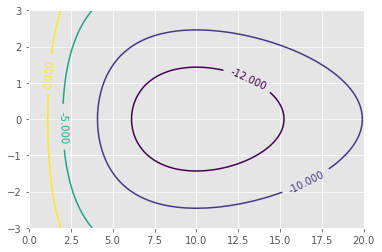

In [10]:
# ガンマ分布の可視化
x, y = np.linspace(0, 20, 100), np.linspace(-3,3,100)
X, Y = np.meshgrid(x, y)
# ハミルトニアンの等高線
CS = plt.contour(X, Y, 0.5 * Y**2 - (k-1)*np.log(X) + lam * X, levels=[-12, -10, -5, 0])
plt.clabel(CS, inline=1, fontsize=10)

### オイラー法を関数で定義

In [11]:
# オイラー法の関数
def euler(q, p, eps, lam, k, f):
    # 引数のfはラムダ関数
    # θ(t+1) = θ(t) + dθ(t)
    q_new = q + eps * p
    # p(t+1) = p(t) + dp(t)
    p_new = p + eps * f(q, lam, k)
    q, p = q_new, p_new
    return q, p

### オイラー法の計算を実行

In [12]:
# オイラー法で計算を行う

# オイラー法の初期値
q, p = 4.0, 0.0
euler_arr = np.zeros([NMCS, 2])
euler_arr[0, 0] = q
euler_arr[0, 1] = p

# NMCS回、オイラー法で更新を行う
for i in range(1, NMCS):
    q, p = euler(q, p, eps, lam, k, f)
    euler_arr[i, 0] = q
    euler_arr[i, 1] = p
df_euler = pd.DataFrame(euler_arr, columns=["q", "p"])

In [15]:
df_euler.head()

,q,p
0,4.00000,0.000000
1,4.00000,0.015000
2,4.00015,0.030000
3,4.00045,0.044999
4,4.00090,0.059996


In [16]:
df_euler.tail()

,q,p
9995,6.987412,-2.436122
9996,6.963051,-2.431810
9997,6.938732,-2.427449
9998,6.914458,-2.423037
9999,6.890228,-2.418575


### オイラー法の計算結果の可視化

d:\work\base_stan_prac\venv\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


<a list of 4 text.Text objects>

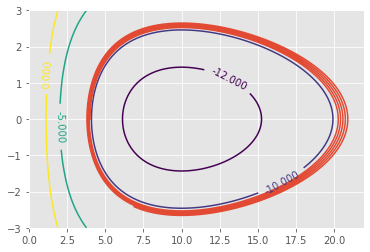

In [17]:
# オイラー法の計算結果
plt.plot(df_euler["q"], df_euler["p"])

# ハミルトニアンの等高線
CS = plt.contour(X, Y, 0.5 * Y**2 - (k-1)*np.log(X) + lam * X, levels=[-12, -10, -5, 0])
plt.clabel(CS, inline=1, fontsize=10)

#### オイラー法だと、何週もしているうちに、少しずつ広がっていく

## Leap-flog法

### Leap-flog法を関数で定義

In [18]:
# Leap-flog法
def leap_flog(q, p, eps, lam, k, f):
    # 更新１：p(t+0.5) = p(t) + 0.5dp(t)
    p_new = p + 0.5 * eps * f(q, lam, k)
    # 更新２：q(t+1) = q(t) + dq(t+0.5)
    q_new = q + eps * p_new
    # 更新３：p(t+1) = p(t+0.5)+0.5dp(t+1)
    p_new = p_new + 0.5 * eps * f(q_new, lam, k)
    
    q, p = q_new, p_new
    return q, p

### Leap-flog法で計算を実行

In [19]:
# 初期値設定
q, p = 4.0, 0.0
lf_arr = np.zeros([NMCS, 2])
lf_arr[0, 0] = q
lf_arr[0, 1] = p
# NMCS回の更新を行う
for i in range(1, NMCS):
    q, p = leap_flog(q, p, eps, lam, k, f)
    lf_arr[i, 0] = q
    lf_arr[i, 1] = p
df_lf = pd.DataFrame(lf_arr, columns=["q", "p"])

### 計算結果を可視化

d:\work\base_stan_prac\venv\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


<a list of 4 text.Text objects>

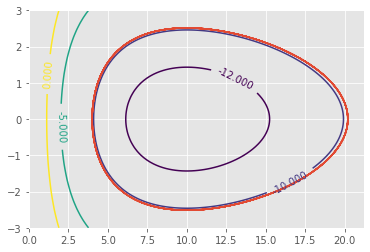

In [20]:
# Leap-flog法の計算結果
plt.plot(df_lf["q"], df_lf["p"])

# ハミルトニアンの等高線
CS = plt.contour(X, Y, 0.5 * Y**2 - (k-1)*np.log(X) + lam * X, levels=[-12, -10, -5, 0])
plt.clabel(CS, inline=1, fontsize=10)

#### 何週してもズレがほとんどない